# 分割と抽出

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import numpy.linalg as LA
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import greedy_modularity_communities

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

## 分割

### Kernighan-Linアルゴリズム
- kernighan_lin_bisection(<グループオブジェクト>, partition=<交換前のグループ>) → 交換後のグループ

In [3]:
colors = ["red", "blue", "green"]

# 2つのグループに分割
init_nodes = np.array_split(G.nodes(), 2)
init_partition = [set(init_nodes[0]), set(init_nodes[1])]
print(init_partition)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}, {32, 33, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


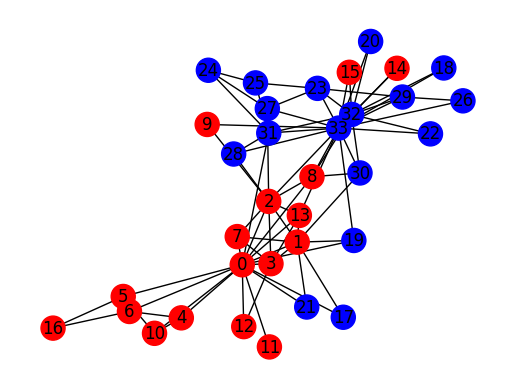

In [4]:
# 初期グループのネットワーク
color_map_i = ["black"] * nx.number_of_nodes(G)
for counter, c in enumerate(init_partition):
    for n in c:
        color_map_i[n] = colors[counter]
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_i)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

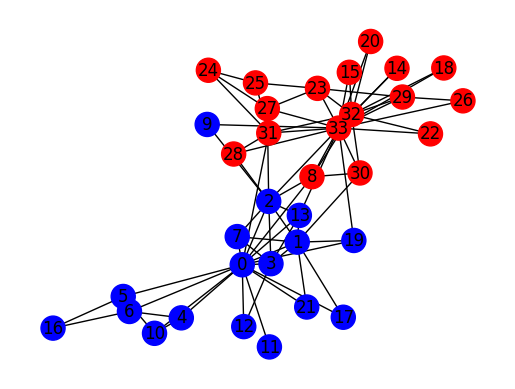

In [5]:
# 交換後グループのネットワーク
lst_b = kernighan_lin_bisection(G, partition=init_partition)
color_map_b = ["black"] * nx.number_of_nodes(G)
for counter, c in enumerate(lst_b):
    for n in c:
        color_map_b[n] = colors[counter]
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_b)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

### スペクトラム分割(未実装)

In [6]:
n1 = len(init_partition[0])
n2 = len(init_partition[1])
n = n1 + n2
ramd = np.linalg.eig(nx.to_numpy_array(G))
R = n1 * n2 / n * ramd[0]

## コミュニティ抽出

#### ラベル伝搬
- label_propagation_communities(<グラフオブジェクト>) → <抽出後のグループ>

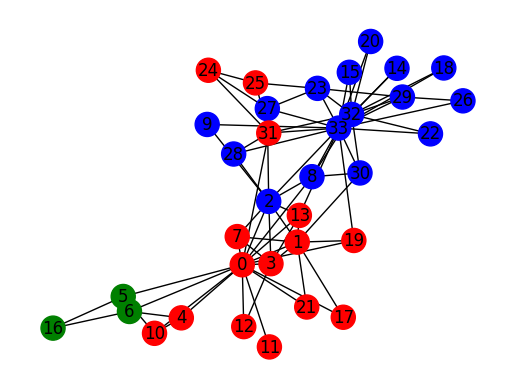

In [7]:
lst_l = label_propagation_communities(G)
color_map_l = ["black"] * G.number_of_nodes()
for counter, c in enumerate(lst_l):
    for n in c:
        color_map_l[n] = colors[counter]
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_l)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

### モジュラリティ最適化
- greedy_modularity_communities(<グラフオブジェクト>) → <抽出後のグループ>

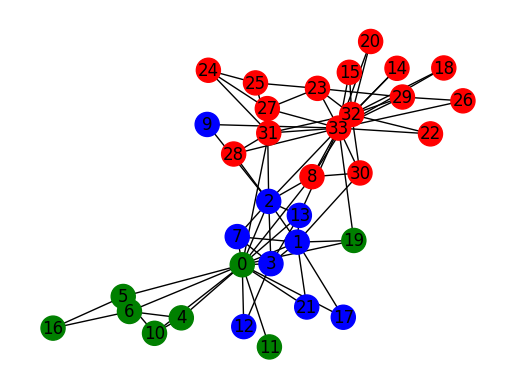

In [8]:
lst_m = greedy_modularity_communities(G)
color_map_m = ["black"] * G.number_of_nodes()
for counter, c in enumerate(lst_m):
    for n in c:
        color_map_m[n] = colors[counter]
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_m)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

### Givan-Newman法
- nx.community.girvan_newman(G)

<generator object girvan_newman at 0x7f38208bd2a0>


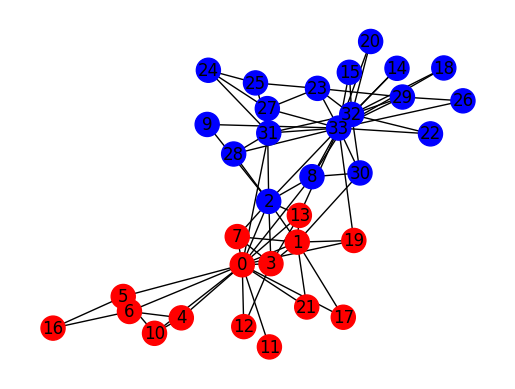

In [9]:
communities = nx.community.girvan_newman(G)
lst_g = next(communities) # 一番上の階層を採用
print(communities)
color_map_g = ["black"] * G.number_of_nodes()
for counter, c in enumerate(lst_g):
    for n in c:
        color_map_g[n] = colors[counter]
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_g)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()